In [1]:
import pandas as pd
import numpy as np

# **Estrutura de Dados no Pandas**


#Series

O que é uma Series?
* array unidimensional (ou podemos entender essa estrutura como sendo uma coluna do Excel);
* ponto de partida para entender as estruras de dados do Pandas.

Usamos o construtor: `pandas.Series( data, index, dtype, copy)`.


* `data`: aceita formas variadas de inputs, como arrays NumPy (ndarray), listas, tuplas, constantes e dicionários.
* `index`: índice do objeto Series, deve ter o mesmo tamanho do array data, o valor default é np.arrange(n), caso nenhum array seja passado.
* `dtype`: informa o dtype dos dados, pode ser inferido.

In [2]:
# Series com uma lista | pd.Series()
series_list = pd.Series([7, 8, 9, 10, 11])
series_list

0     7
1     8
2     9
3    10
4    11
dtype: int64

In [3]:
type(series_list)

pandas.core.series.Series

In [4]:
# Series com uma tupla
series_tupla = pd.Series((7,8,9,10,11))
series_tupla

0     7
1     8
2     9
3    10
4    11
dtype: int64

In [5]:
type(series_tupla)

pandas.core.series.Series

Array do Numpy

In [6]:
np_array = np.array(['f', 'h', 'i', 'j'])
np_array

array(['f', 'h', 'i', 'j'], dtype='<U1')

In [7]:
type(np_array)

numpy.ndarray

In [8]:
# Series com array e definição de índice
pd.Series(np_array, index = [1, 2, 3, 4])

1    f
2    h
3    i
4    j
dtype: object

In [9]:
# Series com dicionário
pd.Series({'a': 99, 'b': 12, 'c': 7, 'd': 56, 'e': 39})

a    99
b    12
c     7
d    56
e    39
dtype: int64

In [10]:
# Series com valor fixo (1º parâmetro) e intervalo de 1 a 10 (2º parâmetro)
pd.Series(100, index = np.arange(1, 11))

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64

##Acessando elementos da series

In [11]:
np.random.seed(7)
data = np.random.randint(low = 1, high =  100, size =  8)
index = ['a', 'b', 'c', 'd', 'e' , 'f', 'g', 'h']
series = pd.Series(data, index = index)

In [12]:
series

a    48
b    69
c    26
d    68
e    84
f    24
g    93
h    58
dtype: int64

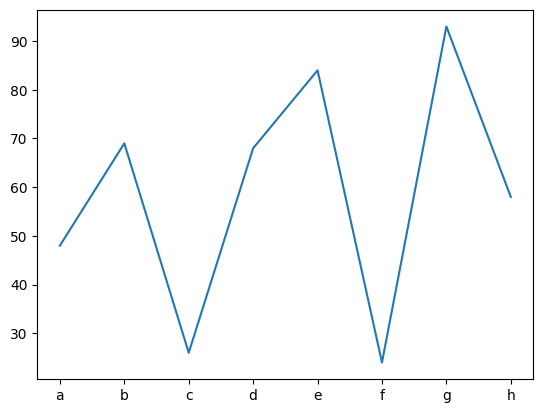

In [13]:
# Visualizando os dados da series, onde o índice é o eixo x e os valores o eixo y | .plot()
series.plot();

In [14]:
# 5 primeiros elementos
series.head()

a    48
b    69
c    26
d    68
e    84
dtype: int64

In [15]:
# 5 últimos elementos
series.tail()

d    68
e    84
f    24
g    93
h    58
dtype: int64

In [16]:
series

a    48
b    69
c    26
d    68
e    84
f    24
g    93
h    58
dtype: int64

###Por posição do elemento

In [17]:
# primeiro elemento
series[0]

48

In [18]:
# último elemento
series[-1:]

h    58
dtype: int64

In [19]:
# 5 primeiros elementos
series[:5]

a    48
b    69
c    26
d    68
e    84
dtype: int64

In [20]:
# elementos entre as posições 1 e 4 (exclusive)
series[1:4]

b    69
c    26
d    68
dtype: int64

In [21]:
# penultimo em diantes (últimos dois elementos)
series[-2:]

g    93
h    58
dtype: int64

###Por label do elemento

In [22]:
series

a    48
b    69
c    26
d    68
e    84
f    24
g    93
h    58
dtype: int64

In [23]:
# pega o primeiro elemento
series['a']

48

In [24]:
# get()
series.get('a')

48

In [25]:
# pega elementos de label 'a' até o 'd'
series['a':'d']

a    48
b    69
c    26
d    68
dtype: int64

In [26]:
# elementos específicos
series[['a', 'c', 'f']]

a    48
c    26
f    24
dtype: int64

##Verificando alguns atributos do objeto series

In [27]:
series

a    48
b    69
c    26
d    68
e    84
f    24
g    93
h    58
dtype: int64

In [28]:
# informações da series | .info()
series.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, a to h
Series name: None
Non-Null Count  Dtype
--------------  -----
8 non-null      int64
dtypes: int64(1)
memory usage: 428.0+ bytes


In [29]:
# informações estatísticas (somento com dados númerico) | .describe()
series.describe()

count     8.000000
mean     58.750000
std      25.064203
min      24.000000
25%      42.500000
50%      63.000000
75%      72.750000
max      93.000000
dtype: float64

In [30]:
# .shape - quantidade de linhas e colunas, como na series só tem uma coluna, então retorna
# apenas um parâmetro na tupla, no caso 8
series.shape

(8,)

In [31]:
# valores do índice | .index
series.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [32]:
# valores da series, retorna um objeto ndarray | .values
series.values

array([48, 69, 26, 68, 84, 24, 93, 58])

In [33]:
type(series.values)

numpy.ndarray

In [34]:
# número de dimensões | .ndim
series.ndim

1

##Estatística descritiva

Aqui usaremos algumas funções que nos trazem dados estatísticos da series

In [35]:
# criando um novo objeto series
notas = [7, 9, 8, 5]
alunos = ['Lucas', 'Laís', 'Tales', 'Rebeca']
series = pd.Series(notas, index = alunos, name = 'Notas Matemática')

In [36]:
series

Lucas     7
Laís      9
Tales     8
Rebeca    5
Name: Notas Matemática, dtype: int64

In [37]:
# informações da series | pandas.DataFrame.info
series.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, Lucas to Rebeca
Series name: Notas Matemática
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


In [38]:
# dados estatísticos | pandas.DataFrame.describe
series.describe()

count    4.000000
mean     7.250000
std      1.707825
min      5.000000
25%      6.500000
50%      7.500000
75%      8.250000
max      9.000000
Name: Notas Matemática, dtype: float64

In [39]:
# média das notas | pandas.DataFrame.mean
series.mean()

7.25

In [40]:
# desvio padrão | pandas.DataFrame.std
series.std()

1.707825127659933

In [41]:
# variância | pandas.DataFrame.var
series.var()

2.9166666666666665

In [42]:
# mediana | pandas.DataFrame.median
series.median()

7.5

In [43]:
# nota máxima | pandas.DataFrame.max
series.max()

9

In [44]:
series

Lucas     7
Laís      9
Tales     8
Rebeca    5
Name: Notas Matemática, dtype: int64

In [45]:
# índice do aluno com nota máxima | pandas.DataFrame.idmax
series.idxmax()

'Laís'

In [46]:
# nota mínima | pandas.DataFrame.min
series.min()

5

In [47]:
# índice do aluno com nota mínima | pandas.DataFrame.idxmin
series.idxmin()

'Rebeca'

##Operações com series

Vejamos agora algumas operações com Series, para tanto iremos criar duas séries.

In [48]:
np.random.seed(8)
n = 5
notas_biologia = pd.Series(np.random.randint(1, 10, size = n))
notas_matematica = pd.Series(np.random.randint(1, 10, size = n))

In [49]:
notas_biologia

0    4
1    5
2    2
3    6
4    9
dtype: int64

In [50]:
notas_matematica

0    4
1    9
2    1
3    6
4    2
dtype: int64

In [51]:
# soma
notas_biologia + notas_matematica

0     8
1    14
2     3
3    12
4    11
dtype: int64

In [52]:
# subtração
notas_biologia - notas_matematica

0    0
1   -4
2    1
3    0
4    7
dtype: int64

In [53]:
#divisão
notas_biologia / notas_matematica

0    1.000000
1    0.555556
2    2.000000
3    1.000000
4    4.500000
dtype: float64

In [54]:
# multiplicação
notas_biologia * notas_matematica

0    16
1    45
2     2
3    36
4    18
dtype: int64

In [55]:
# média global
(notas_biologia + notas_matematica) / 2

0    4.0
1    7.0
2    1.5
3    6.0
4    5.5
dtype: float64

In [56]:
notas_biologia

0    4
1    5
2    2
3    6
4    9
dtype: int64

In [57]:
# selecionando alunos com notas maior que 6
notas_biologia > 6

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [58]:
# selecionando alunos com notas diferente de 6
notas_biologia != 6

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [59]:
# selecionando alunos com notas igual a 6
notas_biologia == 6

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [60]:
# selecionando alunos com notas maior ou igual a 6
notas_biologia >= 6

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [61]:
# retornando alunos com nota maior ou igual a 6
notas_biologia[notas_biologia >= 6]

3    6
4    9
dtype: int64

In [62]:
# retornando alunos com nota igual a 9
notas_biologia[notas_biologia == 9]

4    9
dtype: int64

In [63]:
# retornando alunos com nota diferente de 9
# ou: notas_biologia[notas_biologia != 9]
notas_biologia[~(notas_biologia == 9)]

0    4
1    5
2    2
3    6
dtype: int64

In [64]:
# adicionando novos valores
# nome_series[indice_series] = valor
notas_biologia[5] = 9
notas_biologia[6] = 9
notas_biologia[7] = 4

In [65]:
notas_biologia

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
dtype: int64

##Frequência dos registros

In [66]:
notas_biologia

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
dtype: int64

In [67]:
# contando a frequência (quantidade) de cada registro | pandas.Series.value_counts
notas_biologia.value_counts()

9    3
4    2
5    1
2    1
6    1
dtype: int64

Observe que temos então 3 alunos com nota 9, 2 alunos com notas 4, e assim por diante. Podemos obter esta frequência em termos percentuais, passando `normalize = True` e multiplicando com 100.

In [68]:
notas_biologia.value_counts(normalize = True)*100

9    37.5
4    25.0
5    12.5
2    12.5
6    12.5
dtype: float64

## Concatenação de series

In [69]:
# concatenando um series embaixo da outra, ou seja, fazemos um "append" | pandas.concat
# por padrão, o parâmetro axis é 0
pd.concat([notas_biologia, notas_matematica])

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
0    4
1    9
2    1
3    6
4    2
dtype: int64

In [70]:
pd.concat([notas_biologia, notas_matematica], axis = 0)

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
0    4
1    9
2    1
3    6
4    2
dtype: int64

In [71]:
print(notas_biologia, notas_matematica)

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
dtype: int64 0    4
1    9
2    1
3    6
4    2
dtype: int64


In [72]:
# difinindo o parâmatro axis = 1 vai retornar um series a lado da outra (FULL join)
pd.concat([notas_biologia, notas_matematica], axis = 1)

,0,1
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [73]:
print(type(notas_biologia))
print(type(notas_matematica))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [74]:
notas = pd.concat([notas_biologia, notas_matematica], axis = 1)

In [75]:
# quando definimos o parâmetro igual a 1, na função concat, o objeto se torna um dataframe
notas

,0,1
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [76]:
type(notas)

pandas.core.frame.DataFrame

##Renomeando colunas

In [77]:
notas.columns.tolist()

[0, 1]

In [78]:
# pandas.DataFrame.rename, para fazer a alteração definitiva, basta passar o parâmetro
# inplace = True
notas.rename(columns = {0:'Biologia', 1:'Matemática'})

,Biologia,Matemática
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [79]:
# alteração definitiva | pandas.DataFrame.columns
notas.columns = ['Biologia', 'Matemática']

##Registros nulos - issnull()

In [80]:
# isnull()
notas.isnull().sum()

Biologia      0
Matemática    3
dtype: int64

In [81]:
# outra opção | isna()
notas.isna().sum()

Biologia      0
Matemática    3
dtype: int64

In [82]:
notas

,Biologia,Matemática
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


## Sustituição de registros nulos - fillna()

In [83]:
notas.fillna(0, inplace = False)

,Biologia,Matemática
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,0.0
6,9,0.0
7,4,0.0


In [84]:
notas

,Biologia,Matemática
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [85]:
# substituindo de forma definitiva
notas.fillna(0, inplace = True)

In [86]:
notas

,Biologia,Matemática
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,0.0
6,9,0.0
7,4,0.0


## Média - mean()

In [87]:
# média horizontal (média por linha)
notas.mean(axis = 1)

0    4.0
1    7.0
2    1.5
3    6.0
4    5.5
5    4.5
6    4.5
7    2.0
dtype: float64

In [88]:
# média vertical (por coluna)
notas.mean()

Biologia      6.00
Matemática    2.75
dtype: float64

In [89]:
# criando uma nova coluna no datagrame notas com a respectiva média da linha
notas['Média'] = notas.mean(axis = 1)

In [90]:
notas

,Biologia,Matemática,Média
0,4,4.0,4.0
1,5,9.0,7.0
2,2,1.0,1.5
3,6,6.0,6.0
4,9,2.0,5.5
5,9,0.0,4.5
6,9,0.0,4.5
7,4,0.0,2.0


##Visualização de Dados com Series

In [91]:
np.random.seed(9)
series = pd.Series(np.random.normal(80, 1.5, size = 50))

In [92]:
series.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: None
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [93]:
series

0     80.001663
1     79.565684
2     78.325901
3     79.980676
4     79.432458
5     79.278297
6     77.724003
7     79.263692
8     79.638979
9     79.028079
10    80.953837
11    82.610176
12    80.445023
13    81.061255
14    82.734224
15    80.646154
16    82.314094
17    78.648918
18    79.794312
19    81.946369
20    81.012907
21    80.047937
22    81.377219
23    80.570764
24    80.774551
25    79.467141
26    80.313166
27    80.492617
28    79.252663
29    76.862335
30    79.876118
31    83.682774
32    75.991835
33    78.630081
34    79.659028
35    80.403973
36    81.695692
37    81.563596
38    81.955716
39    82.084101
40    79.015321
41    79.915614
42    79.250146
43    80.654629
44    79.436280
45    78.615408
46    82.875875
47    79.774546
48    79.041905
49    81.237155
dtype: float64

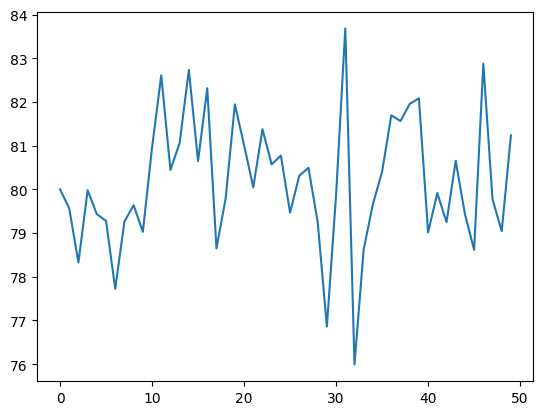

In [94]:
# gráfico de linhas
# eixo x: índice | eixo y: valores
series.plot();

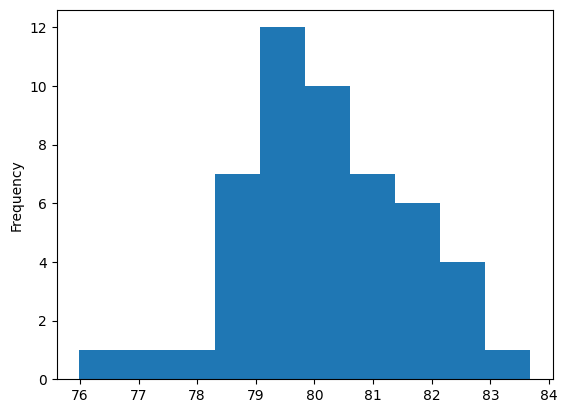

In [95]:
# histograma
series.plot(kind = 'hist');

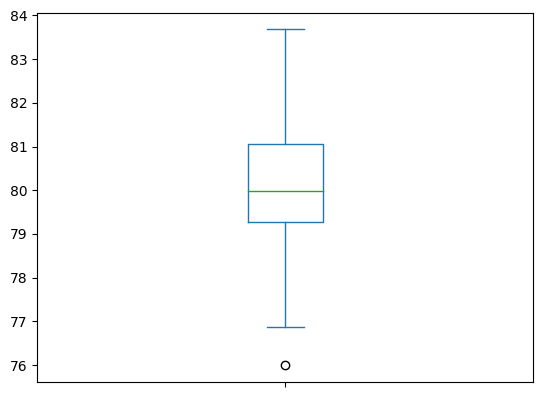

In [96]:
# boxplot
series.plot(kind = 'box');

#DataFrame

Um data frame é semelhante a uma matriz mas as suas colunas têm nomes e podem conter dados de tipo diferente. Um data frame pode ser visto como uma tabela de uma base de dados, em que cada linha corresponde a um registo (linha) da tabela. Cada coluna corresponde às propriedades (campos) a serem armazenadas para cada registo da tabela.

<p>Criando um dataframe<p> Exemplo 1

In [97]:
# dicionário com dados para criar um dataframe, onde cada chave é o nome de uma coluna
# o valor é uma lista contendo as linhas da respectiva coluna
dados = {'idCliente': [1, 2, 3, 4, 5],
         'idade': [45, 30, 18, 22, 56],
         'cidade': ['Salvador', 'São Paulo', 'Rio de Janeiro', 'Recife', 'Belo Horizonte'],
         'rating': [5.5, 0.5, 2.3, 7.8, 9.1]
        }

In [98]:
dados

{'idCliente': [1, 2, 3, 4, 5],
 'idade': [45, 30, 18, 22, 56],
 'cidade': ['Salvador',
  'São Paulo',
  'Rio de Janeiro',
  'Recife',
  'Belo Horizonte'],
 'rating': [5.5, 0.5, 2.3, 7.8, 9.1]}

In [99]:
# criando uma estrutura de dataframe | pandas.DataFrame
df = pd.DataFrame(dados)

In [100]:
# verificando o dataframe
df

,idCliente,idade,cidade,rating
0,1,45,Salvador,5.5
1,2,30,São Paulo,0.5
2,3,18,Rio de Janeiro,2.3
3,4,22,Recife,7.8
4,5,56,Belo Horizonte,9.1


## info() -  detalhes do dataframe

In [101]:
# informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCliente  5 non-null      int64  
 1   idade      5 non-null      int64  
 2   cidade     5 non-null      object 
 3   rating     5 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 288.0+ bytes


Como vemos acima, o dataframe 'df' possui 5 linhas (registros), que vai do índice 0 ao 4, e possui 4 colunas (campos).

<p>Criando um DataFrame<p> Exemplo 2

In [102]:
# lista contendo nomes
nomes = ['Lucas', 'Gabriel', 'Laís', 'Neide', 'Tales', 'Rebeca']
# lista contendo as notas de matemática
notas_matematica = [7, 9, 10, 8, 5, 9]
# lista contendo as notas de biologia
notas_biologia = [10, 9, 7, 7, 5, 6]
# dicionário armazeando em suas chaves (futuros campos do dataframe) as variáveis acima como valor.
data = {
        'Nome': nomes ,
        'Matemática': notas_matematica,
        'Biologia': notas_biologia
       }
# criando o dataframe
df = pd.DataFrame(data)
df

,Nome,Matemática,Biologia
0,Lucas,7,10
1,Gabriel,9,9
2,Laís,10,7
3,Neide,8,7
4,Tales,5,5
5,Rebeca,9,6


In [103]:
type(df)

pandas.core.frame.DataFrame

<p>Criando um DataFrame<p> Exemplo 3

- `no.random.seed()`: Fixa números aleatórios;
- `np.arange()`: Retorna valores uniformemente espaçados dentro de um determinado intervalo;
- `np.random.randint()`: Retorna números inteiros aleatórios sendo o primeiro parâmetro inclusivo, o segundo exclusivo e o terceiro a quantidade de números;
- `np.random.choice()`: Gera uma amostra aleatória de uma determinada matriz. Primeiro parâmetro é a amostra aleatória e o segundo parâmetro é a quantidade de valores.

In [104]:
np.random.seed(10)
# quantidade de observações
n = 100

escolaridade = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

cidades = ['São Paulo', 'Recife', 'Salvador', 'Salvador', 'Rio de Janeiro']

sexo = ['Masculino', 'Feminino']

# dicionário com dados
data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(18, 70, size = n),
    'Renda': np.random.randint(1_500, 10_000, size = n),
    'Sexo': np.random.choice(sexo, size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n),
    'Cidade': np.random.choice(cidades, size = n)
}

df = pd.DataFrame(data)

In [105]:
df

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro


## head() - primeiros registros

In [106]:
# 10 primeiras linhas | Pandas.DataFrame.head()
df.head(10)

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife
5,6,46,9345,Masculino,Ensino Superior,São Paulo
6,7,43,2414,Feminino,Ensino Médio,São Paulo
7,8,47,3039,Feminino,Ensino Fundamental,Salvador
8,9,66,4345,Feminino,Ensino Médio,Recife
9,10,47,9452,Masculino,Ensino Fundamental,Salvador


## tail() - últimos registros

In [107]:
# 10 últimas linhas | Pandas.DataFrame.tail()
df.tail(10)

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
90,91,29,3027,Masculino,Ensino Médio,Recife
91,92,66,5946,Feminino,Ensino Superior,São Paulo
92,93,30,4658,Masculino,Ensino Médio,Recife
93,94,46,9121,Masculino,Ensino Fundamental,Recife
94,95,50,8457,Feminino,Ensino Médio,Salvador
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro
99,100,60,4265,Masculino,Ensino Fundamental,Salvador


## shape() - quantidade de linhas e colunas

In [108]:
# quantidade de linhas e colunas | Pandas.DataFrame.shape
df.shape

(100, 6)

##len() - quantidade de linhas

In [109]:
# quantidade de linhas
len(df)

100

In [110]:
# checa o tipo do objeto
type(df.shape)

tuple

In [111]:
type(df)

pandas.core.frame.DataFrame

##size - linha x coluna

In [112]:
# linha x coluna
df.size

600

In [113]:
# sumário do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            100 non-null    int64 
 1   Idade         100 non-null    int64 
 2   Renda         100 non-null    int64 
 3   Sexo          100 non-null    object
 4   Escolaridade  100 non-null    object
 5   Cidade        100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


##index - índice do dataframe

In [114]:
# índice do DataFrame
df.index

RangeIndex(start=0, stop=100, step=1)

## columns - colunas do dataframe

In [115]:
# colunas do DataFrame
df.columns

Index(['Id', 'Idade', 'Renda', 'Sexo', 'Escolaridade', 'Cidade'], dtype='object')

## dtypes - tipo de dado de cada coluna

In [116]:
# tipo de dado de cada coluna
df.dtypes

Id               int64
Idade            int64
Renda            int64
Sexo            object
Escolaridade    object
Cidade          object
dtype: object

##ndim - número de dimensões

In [118]:
# número de dimensões
df.ndim

2

In [117]:
# selecionando apenas uma coluna DataFrame.nomeColuna
# Caso a coluna tenha espaço, será necessário por entre colchetes e aspas: DataFrame['Coluna c/ Espaço']
df.Idade

0     27
1     54
2     33
3     18
4     67
      ..
95    67
96    33
97    62
98    58
99    60
Name: Idade, Length: 100, dtype: int64

In [120]:
# Series: vetor unidimensional
# quando selecionamos apenas uma coluna do DataFrame, esta vira um Panda series
type(df.Idade)

pandas.core.series.Series

##describe - sumário estatístico

In [121]:
# sumário estatístico dos dados das colunas que contenham tipo número
df.describe()

,Id,Idade,Renda
count,100.000000,100.000000,100.000000
mean,50.500000,43.140000,5885.120000
std,29.011492,14.227602,2328.749998
min,1.000000,18.000000,1912.000000
25%,25.750000,31.000000,3858.500000
50%,50.500000,42.000000,5944.500000
75%,75.250000,54.000000,7961.250000
max,100.000000,69.000000,9978.000000


In [122]:
# 'all': permite gerar um sumário descritivo para as colunas categóricas
df.describe(include = 'all')

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
count,100.000000,100.000000,100.000000,100,100,100
unique,NaN,NaN,NaN,2,3,4
top,NaN,NaN,NaN,Masculino,Ensino Médio,Salvador
freq,NaN,NaN,NaN,51,36,46
mean,50.500000,43.140000,5885.120000,NaN,NaN,NaN
std,29.011492,14.227602,2328.749998,NaN,NaN,NaN
min,1.000000,18.000000,1912.000000,NaN,NaN,NaN
25%,25.750000,31.000000,3858.500000,NaN,NaN,NaN
50%,50.500000,42.000000,5944.500000,NaN,NaN,NaN
75%,75.250000,54.000000,7961.250000,NaN,NaN,NaN


##T - transposição da tabela

In [124]:
# transposição do resultado do sumário estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Idade,100.0,43.14,14.227602,18.0,31.00,42.0,54.00,69.0
Renda,100.0,5885.12,2328.749998,1912.0,3858.50,5944.5,7961.25,9978.0


## count() - quantidade de observações não nulas por coluna

In [123]:
# quantidade de observações não nulas por coluna
df.count()

Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64